In [38]:
import pandas as pd

In [39]:
import numpy as np

In [40]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [41]:
import yfinance as yf

In [42]:
df = yf.download("AAPL", start="2018-01-01")

[*********************100%***********************]  1 of 1 completed


In [43]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341877,40.351247,39.639302,39.850076,102223600
2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2018-01-04,40.522221,40.625266,40.299739,40.407465,89738400
2018-01-05,40.983578,41.070228,40.526904,40.618239,94640000
2018-01-08,40.831352,41.126433,40.732989,40.831352,82271200


In [44]:
df.columns = df.columns.droplevel(1)

In [45]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.341877,40.351247,39.639302,39.850076,102223600
2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2018-01-04,40.522221,40.625266,40.299739,40.407465,89738400
2018-01-05,40.983578,41.070228,40.526904,40.618239,94640000
2018-01-08,40.831352,41.126433,40.732989,40.831352,82271200


In [46]:
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000
2025-12-22,270.970001,273.880005,270.510010,272.859985,36571800
2025-12-23,272.359985,272.500000,269.559998,270.839996,29642000
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,274.165009,275.369995,273.899994,274.230011,12438314


In [47]:
df.describe()

Price,Close,High,Low,Open,Volume
count,2008.000000,2008.000000,2008.000000,2008.000000,2.008000e+03
mean,135.311494,136.679081,133.807909,135.180271,9.452747e+07
std,66.654391,67.237145,65.998604,66.587567,5.445123e+07
min,33.799675,34.638783,33.754510,34.225170,1.243831e+07
25%,64.367691,64.708391,63.538523,64.118794,5.572010e+07
50%,142.910294,144.462436,141.226374,142.724614,8.107385e+07
75%,182.724461,184.381225,180.968754,182.325632,1.151801e+08
max,286.190002,288.619995,283.299988,286.200012,4.265100e+08


In [48]:
df["ret_1"] = df["Close"].pct_change()

In [49]:
df[["Close", "ret_1"]].describe()


Price,Close,ret_1
count,2008.000000,2007.000000
mean,135.311494,0.001143
std,66.654391,0.019410
min,33.799675,-0.128647
25%,64.367691,-0.007925
50%,142.910294,0.001187
75%,182.724461,0.011073
max,286.190002,0.153288


In [50]:
df[["Close", "ret_1"]].head(6)


Price,Close,ret_1
Date,,
2018-01-02,40.341877,NaN
2018-01-03,40.334854,-0.000174
2018-01-04,40.522221,0.004645
2018-01-05,40.983578,0.011385
2018-01-08,40.831352,-0.003714
2018-01-09,40.826668,-0.000115


In [51]:
df[["Close", "ret_1"]].tail(6)

Price,Close,ret_1
Date,,
2025-12-18,272.190002,0.001288
2025-12-19,273.670013,0.005437
2025-12-22,270.970001,-0.009866
2025-12-23,272.359985,0.005130
2025-12-24,273.809998,0.005324
2025-12-26,274.165009,0.001297


In [52]:
df["ret_lag1"] = df["ret_1"].shift(1)

In [53]:
df[["ret_1", "ret_lag1"]].tail(8)


Price,ret_1,ret_lag1
Date,,
2025-12-16,0.001824,-0.014985
2025-12-17,-0.010087,0.001824
2025-12-18,0.001288,-0.010087
2025-12-19,0.005437,0.001288
2025-12-22,-0.009866,0.005437
2025-12-23,0.005130,-0.009866
2025-12-24,0.005324,0.005130
2025-12-26,0.001297,0.005324


In [54]:
df["ret_lag1"] = df["ret_1"].shift(1)
df["ret_lag5"] = df["ret_1"].shift(5)
df["ret_lag10"] = df["ret_1"].shift(10)

df[["ret_1", "ret_lag1", "ret_lag5", "ret_lag10"]].tail(15)


Price,ret_1,ret_lag1,ret_lag5,ret_lag10
Date,,,,
2025-12-05,-0.006840,-0.012141,0.004684,-0.008601
2025-12-08,-0.003192,-0.006840,0.015241,0.019681
2025-12-09,-0.002555,-0.003192,0.010915,0.016317
2025-12-10,0.005772,-0.002555,-0.007128,0.003805
2025-12-11,-0.002690,0.005772,-0.012141,0.002094
2025-12-12,0.000899,-0.002690,-0.006840,0.004684
2025-12-15,-0.014985,0.000899,-0.003192,0.015241
2025-12-16,0.001824,-0.014985,-0.002555,0.010915
2025-12-17,-0.010087,0.001824,0.005772,-0.007128


In [55]:
df = df.dropna()


In [56]:
df[["ret_1", "ret_lag1", "ret_lag5", "ret_lag10"]].head(15)


Price,ret_1,ret_lag1,ret_lag5,ret_lag10
Date,,,,
2018-01-18,0.000893,0.016516,-0.000229,-0.000174
2018-01-19,-0.004463,0.000893,0.005680,0.004645
2018-01-22,-0.008181,-0.004463,0.010326,0.011385
2018-01-23,0.000226,-0.008181,-0.005082,-0.003714
2018-01-24,-0.015929,0.000226,0.016516,-0.000115
2018-01-25,-0.017851,-0.015929,0.000893,-0.000229
2018-01-26,0.002338,-0.017851,-0.004463,0.005680
2018-01-29,-0.020699,0.002338,-0.008181,0.010326
2018-01-30,-0.005894,-0.020699,0.000226,-0.005082


In [57]:
x = df[["ret_lag1", "ret_lag5", "ret_lag10"]]
y = df["ret_1"]

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
split_date = "2022-01-01"

In [60]:
split_date = "2022-01-01"

x_train = x[x.index < split_date]
x_test  = x[x.index >= split_date]

y_train = y[y.index < split_date]
y_test  = y[y.index >= split_date]

In [61]:
x.shape

(1997, 3)

In [62]:
x_train.shape

(997, 3)

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(0.018263447808018026)

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=5,
    random_state=42
)


In [65]:
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


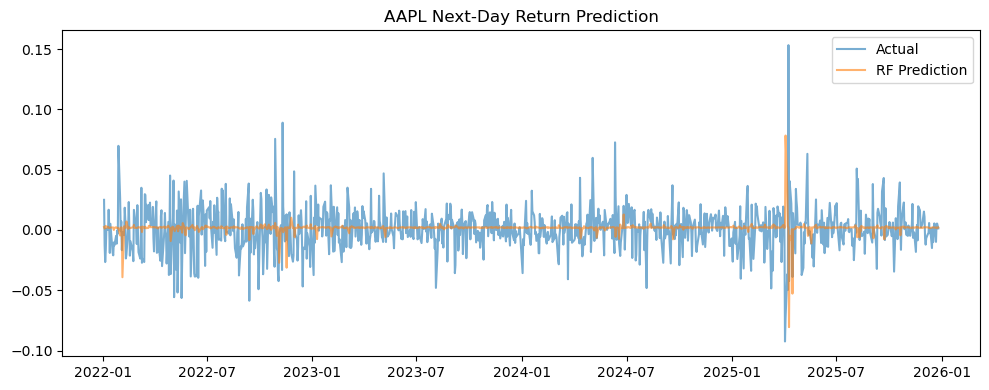

In [66]:
plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test.values, label="Actual", alpha=0.6)
plt.plot(y_test.index, rf_pred, label="RF Prediction", alpha=0.6)
plt.title("AAPL Next-Day Return Prediction")
plt.legend()
plt.tight_layout()
plt.show()
